# Qiskit Tutorial 2 - Adicionando portas e executando circuito
### Tutorial de criação de um circuito quântico simples de 2 qubits
Criando um circuito quântico de dois qubits com portas quânticas para depois ser executado em um simulador
e num computador quântico real da IBM

In [19]:
# Importando módulos
from qiskit import *
from qiskit.tools.visualization import plot_histogram

In [20]:
# Inicializando o circuito

nQubits = 2
nBits = 2
circuitoQuantico = QuantumCircuit(nQubits, nBits)

In [21]:
# Para aplicar uma porta no circuito devemos seguir o seguinte exemplo onde aplicamos uma Hadamard Gate

circuitoQuantico.h(0)

# Nesse exemplo h() é a função que usamos para aplicar uma Hadamard Gate e o argumento é o índice do qubit
# onde se deseja aplica a porta

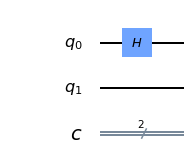

In [22]:
# Podemos ver ao chamar draw() que a Hadamard Gate fica no qubit desejado

circuitoQuantico.draw(output = 'mpl')

In [23]:
# Podemos aplicar também portas que envolvem mais de um qubit, como a CNOT(Controlled NOT) Gate

circuitoQuantico.cx(0,1)

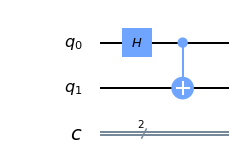

In [24]:
# Visualização do circuito após chamar a CNOT Gate

circuitoQuantico.draw(output = 'mpl')

In [25]:
# Agora podemos medir esses qubits após as operações chamando measure()

circuitoQuantico.measure(0,0)
circuitoQuantico.measure(1,1)

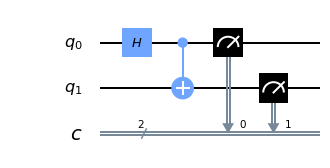

In [26]:
# Visualização do circuito após chamar measure()

circuitoQuantico.draw(output = 'mpl')

### Simulando o circuito

In [27]:
# Para simular um circuito quântico usamos um elemento do Qiskit chamado Aer, que tem como 
# uma de suas funções a simulação de circuitos

simulador = Aer.get_backend('qasm_simulator')

In [28]:
# Para executar o circuito chamamos execute() que leva como argumento o circuito a ser executado e o 
# backend(aonde o circuito vai ser executado) que nesse caso é no simulador do Aer

resultado = execute(circuitoQuantico, backend = simulador).result()

# Usamos a variável resultado para guardar os dados do resultado

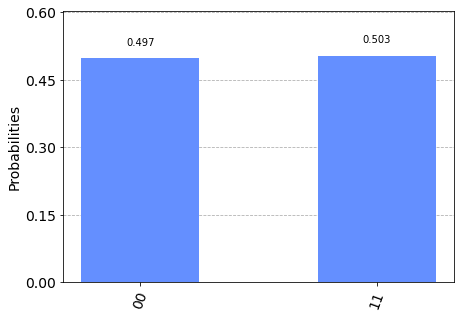

In [29]:
# Para exibir os resultados chamamos plot_histogram()

plot_histogram(resultado.get_counts(circuitoQuantico))

### Rodando o circuito em um computador real da IBM

In [30]:
# Antes de tudo é necessário importar o módulo da IBMQ Experience e carregar a sua conta

from qiskit import IBMQ

IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-08-28 08:25:02,153: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [31]:
# Agora precisamos inicializar a variável de provider que vai ser responsável por ter o acesso a 
# um dos computadores quanticos da IBM

provedor = IBMQ.get_provider('ibm-q')

In [32]:
# Podemos agora escolher um dos computadores disponíveis da IBM para podermos rodar nosso circuito

computadorQuantico = provedor.get_backend('ibmq_16_melbourne')

In [36]:
# Para simular no nosso próprio computado tivemos que usar
# " execute(circuitoQuantico, backend = simulador) "
# Agora vamos ter que fazer algo similar

executar = execute(circuitoQuantico, backend=computadorQuantico)

In [38]:
# Depois de rodar o comando " execute(circuitoQuantico, backend=computadorQuantico).result() "
# o nosso circuito entra numa fila do computador da IBM que escolhemos roda. Como se fosse uma 
# lista de pedidos num restaurante para o cozinheiro preparar.

# Podemos checar o status do nosso "pedido" chamando o job_monitor

from qiskit.tools.monitor import job_monitor

job_monitor(executar)

Job Status: job has successfully run


In [39]:
# Para pegar o resultado do circuito fazemos o seguinte

resultado = executar.result()

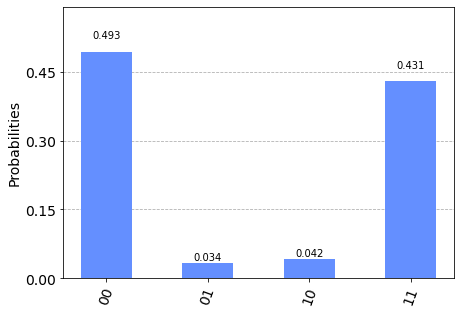

In [42]:
# Da mesma forma como na simulação no próprio computador podemos exibir os resultados num histograma

plot_histogram(resultado.get_counts(circuitoQuantico))